## 1. Importing libraries for Decision Tree and ANN 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [8]:
# Importing the data

df_answers = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Supervised marchine learning\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
df_temp = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\dataset_scaled_temp.csv')
df_unscaled = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\Dataset-weather-prediction-dataset-processed.csv')

In [10]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# We choose to focus on a single year for analysis the Pleasant weather f

df_answers_1991 = df_answers[df_answers['DATE'].astype(str).str.contains('1991')] #<-----INSERT YEAR HERE

In [11]:
df_temp.head()

,Unnamed: 0,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,...,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,11323,1991-01-01,1,-0.773075,-0.631005,-1.028583,-0.826356,-0.871621,-0.953178,-0.787848,...,-0.813810,-0.817231,-1.230904,-0.781005,-1.302981,-0.808980,-0.928711,-1.299234,-0.837763,-0.878510
1,11324,1991-01-02,1,-0.678010,-1.119018,-0.910949,0.012222,0.100337,-0.799717,-0.665550,...,-1.213407,-0.082081,-1.473528,-0.466820,-0.635564,-1.398318,-0.826335,-0.689646,-0.320071,-0.638173
2,11325,1991-01-03,1,-0.026139,-0.812591,-0.675681,-0.320045,-0.312009,-0.428855,-0.595665,...,-0.486867,-0.277121,-1.527444,-0.026962,-0.890396,-1.263612,0.095046,-0.478156,-0.288696,-1.569480
3,11326,1991-01-04,1,-0.610107,-0.778544,-0.946239,-0.668134,-0.577088,-0.774141,-0.945090,...,-0.281014,-0.637194,-1.311779,-0.416551,-0.647699,-0.775304,-0.138956,-0.726968,-0.790700,-1.329143
4,11327,1991-01-05,1,-0.637268,-0.801242,-0.805078,-0.731423,-0.606541,-0.748564,-0.875205,...,-1.031772,-0.787225,-1.392653,-0.781005,-0.429272,-1.027877,-0.914086,-0.478156,-0.853451,-1.539438


In [31]:
df_temp.columns

Index(['Unnamed: 0', 'DATE', 'MONTH', 'BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean',
       'GDANSK_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean', 'ROMA_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'TOURS_temp_mean',
       'VALENTIA_temp_mean'],
      dtype='object')

## 2. Decision tree

In [43]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_temp[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']]
y = df_answers_1991.drop(['DATE'], axis=1)

In [44]:
print(X.shape)
print(y.shape)

(365, 15)
(365, 15)


In [45]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 15)
(92, 15)
(273, 15)
(92, 15)


[Text(0.5069127457865169, 0.9615384615384616, 'x[6] <= 0.651\ngini = 0.331\nsamples = 273\nvalue = [[191, 82]\n[186, 87]\n[183, 90]\n[219, 54]\n[204, 69]\n[206, 67]\n[216, 57]\n[197, 76]\n[214, 59]\n[151, 122]\n[213, 60]\n[229, 44]\n[273, 0]\n[232, 41]\n[247, 26]]'),
 Text(0.19039676966292135, 0.8846153846153846, 'x[9] <= -0.321\ngini = 0.126\nsamples = 186\nvalue = [[170, 16]\n[155, 31]\n[157, 29]\n[180, 6]\n[176, 10]\n[174, 12]\n[181, 5]\n[167, 19]\n[178, 8]\n[137, 49]\n[178, 8]\n[183, 3]\n[186, 0]\n[183, 3]\n[181, 5]]'),
 Text(0.3486547577247191, 0.9230769230769231, 'True  '),
 Text(0.05758426966292135, 0.8076923076923077, 'x[2] <= 0.071\ngini = 0.039\nsamples = 130\nvalue = [[127, 3]\n[119, 11]\n[122, 8]\n[129, 1]\n[127, 3]\n[129, 1]\n[128, 2]\n[126, 4]\n[127, 3]\n[129, 1]\n[128, 2]\n[130, 0]\n[130, 0]\n[129, 1]\n[130, 0]]'),
 Text(0.033707865168539325, 0.7307692307692307, 'x[6] <= 0.12\ngini = 0.006\nsamples = 111\nvalue = [[109, 2]\n[110, 1]\n[111, 0]\n[111, 0]\n[110, 1]\n[111, 0

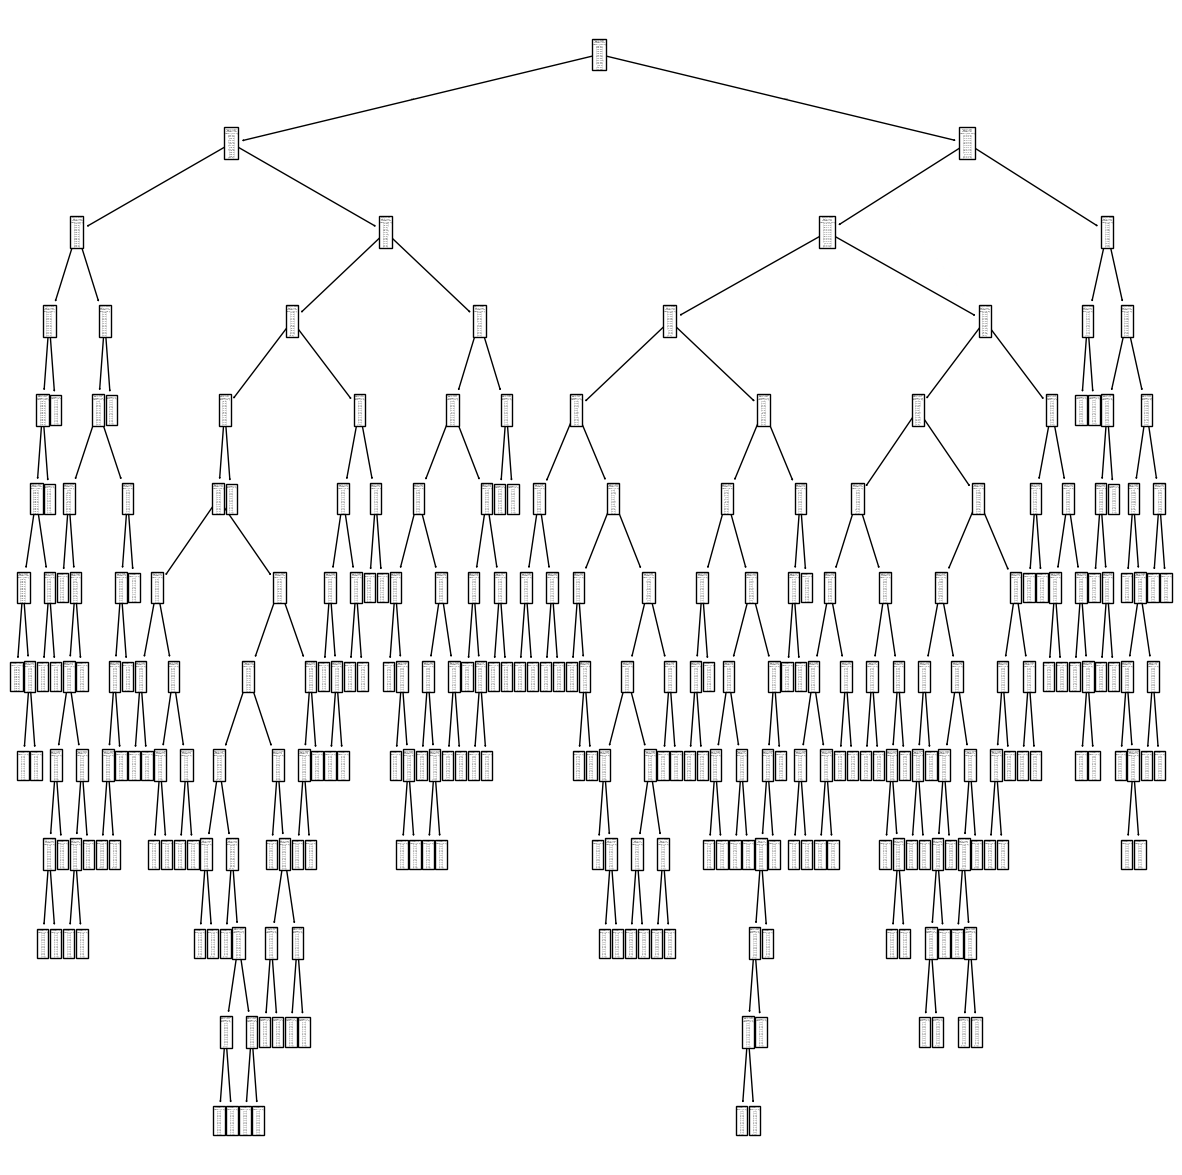

In [48]:
#Run Decision Tree classifier
temp_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
temp_dt.fit(X_train, y_train)
plt.figure(figsize=(15,15))
tree.plot_tree(temp_dt)

In [49]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = temp_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(temp_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.38827838827838823


C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


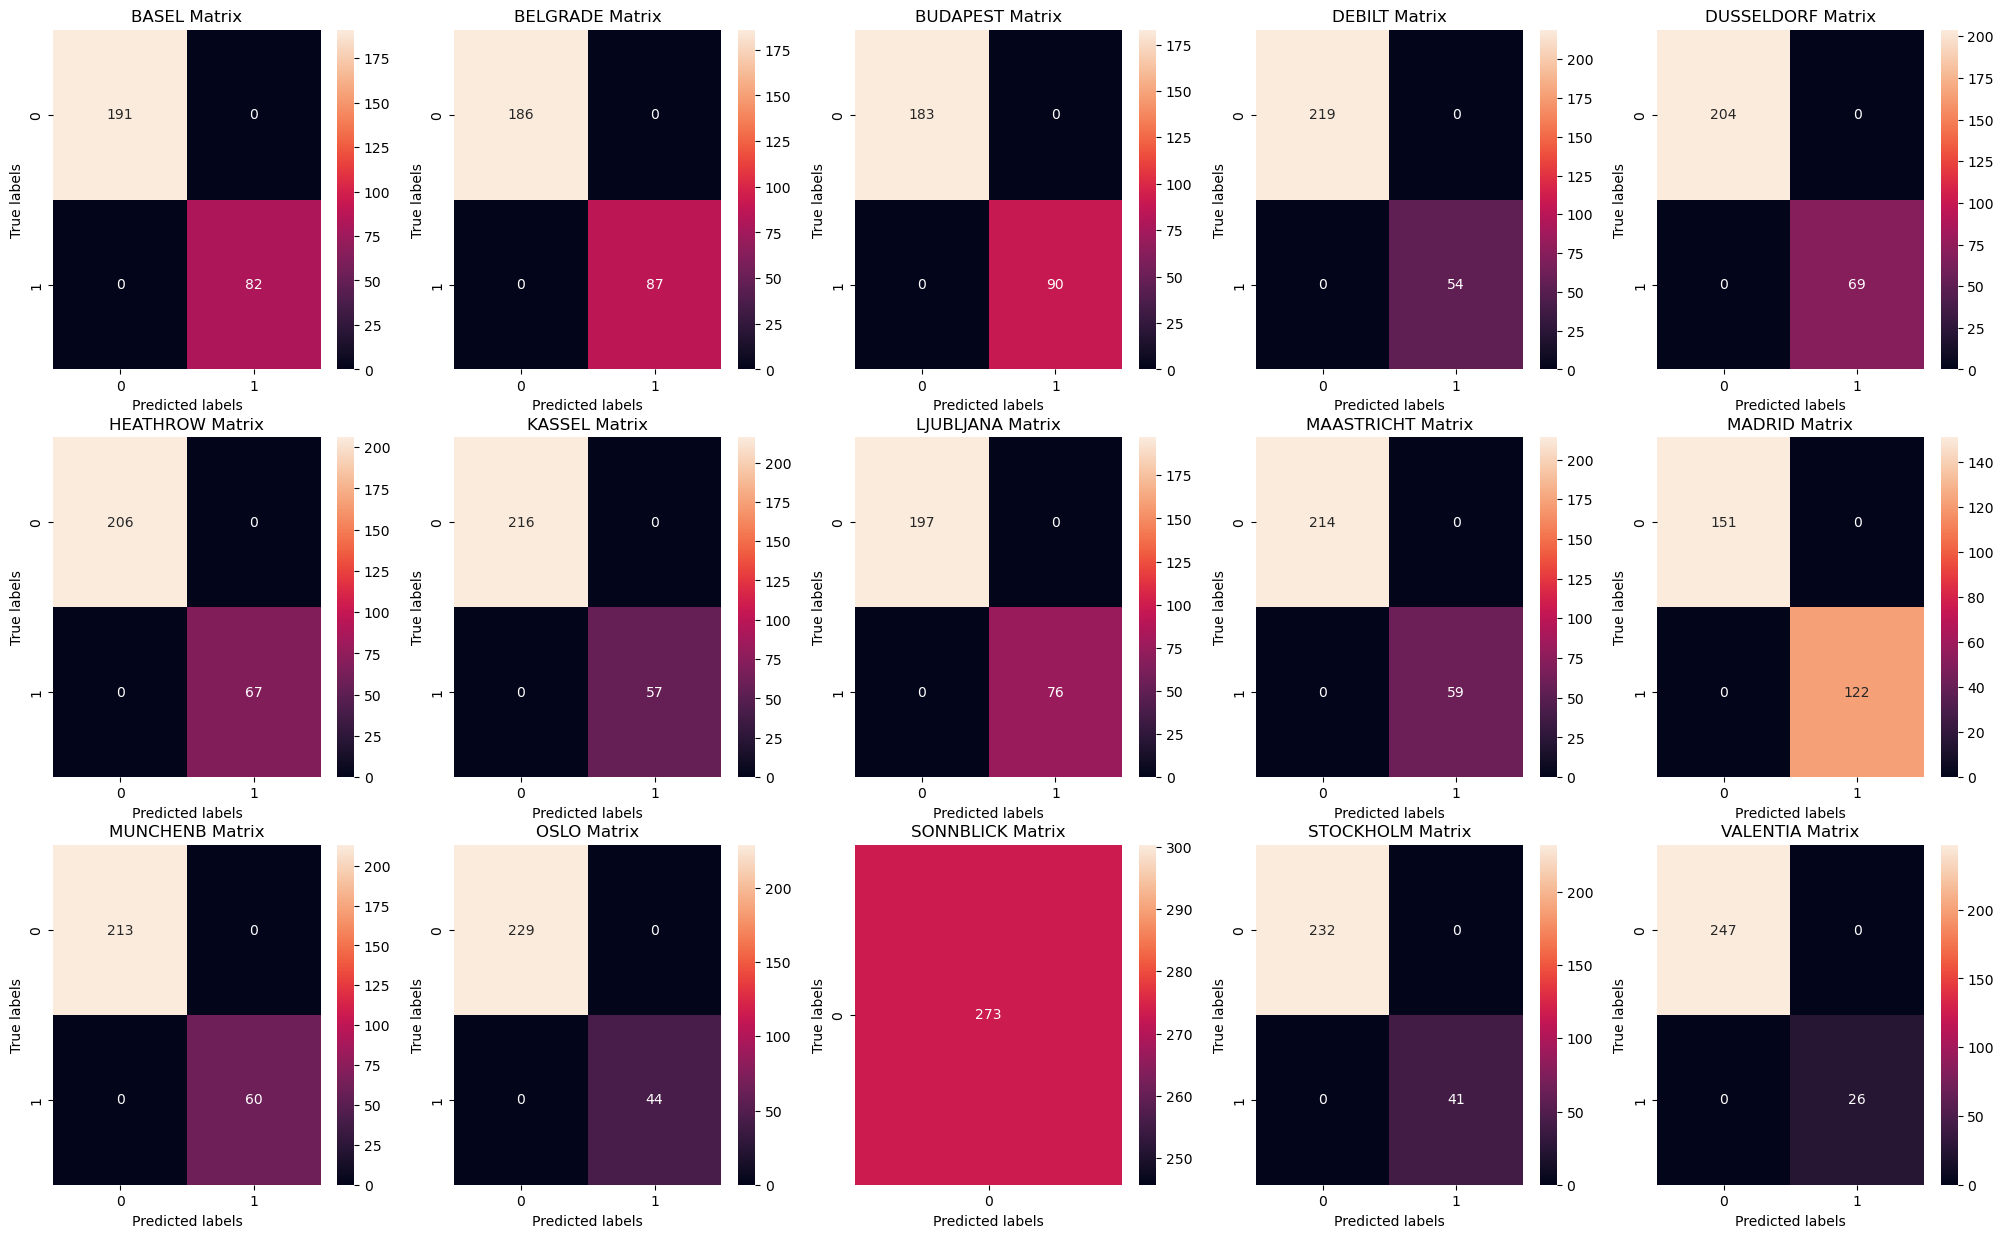

In [68]:
locations = list({x.split("_")[0] for x in df_temp[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

[Text(0.5461956521739131, 0.9444444444444444, 'x[0] <= 0.585\ngini = 0.245\nsamples = 92\nvalue = [[80, 12]\n[67, 25]\n[70, 22]\n[83, 9]\n[73, 19]\n[80, 12]\n[78, 14]\n[71, 21]\n[75, 17]\n[67, 25]\n[82, 10]\n[83, 9]\n[92, 0]\n[81, 11]\n[89, 3]]'),
 Text(0.3451086956521739, 0.8333333333333334, 'x[3] <= 0.74\ngini = 0.071\nsamples = 71\nvalue = [[68.0, 3.0]\n[64.0, 7.0]\n[66.0, 5.0]\n[69.0, 2.0]\n[68.0, 3.0]\n[71.0, 0.0]\n[69.0, 2.0]\n[67.0, 4.0]\n[67.0, 4.0]\n[62.0, 9.0]\n[69.0, 2.0]\n[71.0, 0.0]\n[71.0, 0.0]\n[71.0, 0.0]\n[71.0, 0.0]]'),
 Text(0.44565217391304346, 0.8888888888888888, 'True  '),
 Text(0.2554347826086957, 0.7222222222222222, 'x[9] <= -0.368\ngini = 0.053\nsamples = 69\nvalue = [[67, 2]\n[64, 5]\n[64, 5]\n[69, 0]\n[68, 1]\n[69, 0]\n[69, 0]\n[65, 4]\n[67, 2]\n[60, 9]\n[67, 2]\n[69, 0]\n[69, 0]\n[69, 0]\n[69, 0]]'),
 Text(0.14130434782608695, 0.6111111111111112, 'x[7] <= -0.027\ngini = 0.028\nsamples = 59\nvalue = [[58, 1]\n[55, 4]\n[55, 4]\n[59, 0]\n[59, 0]\n[59, 0]\n[59, 

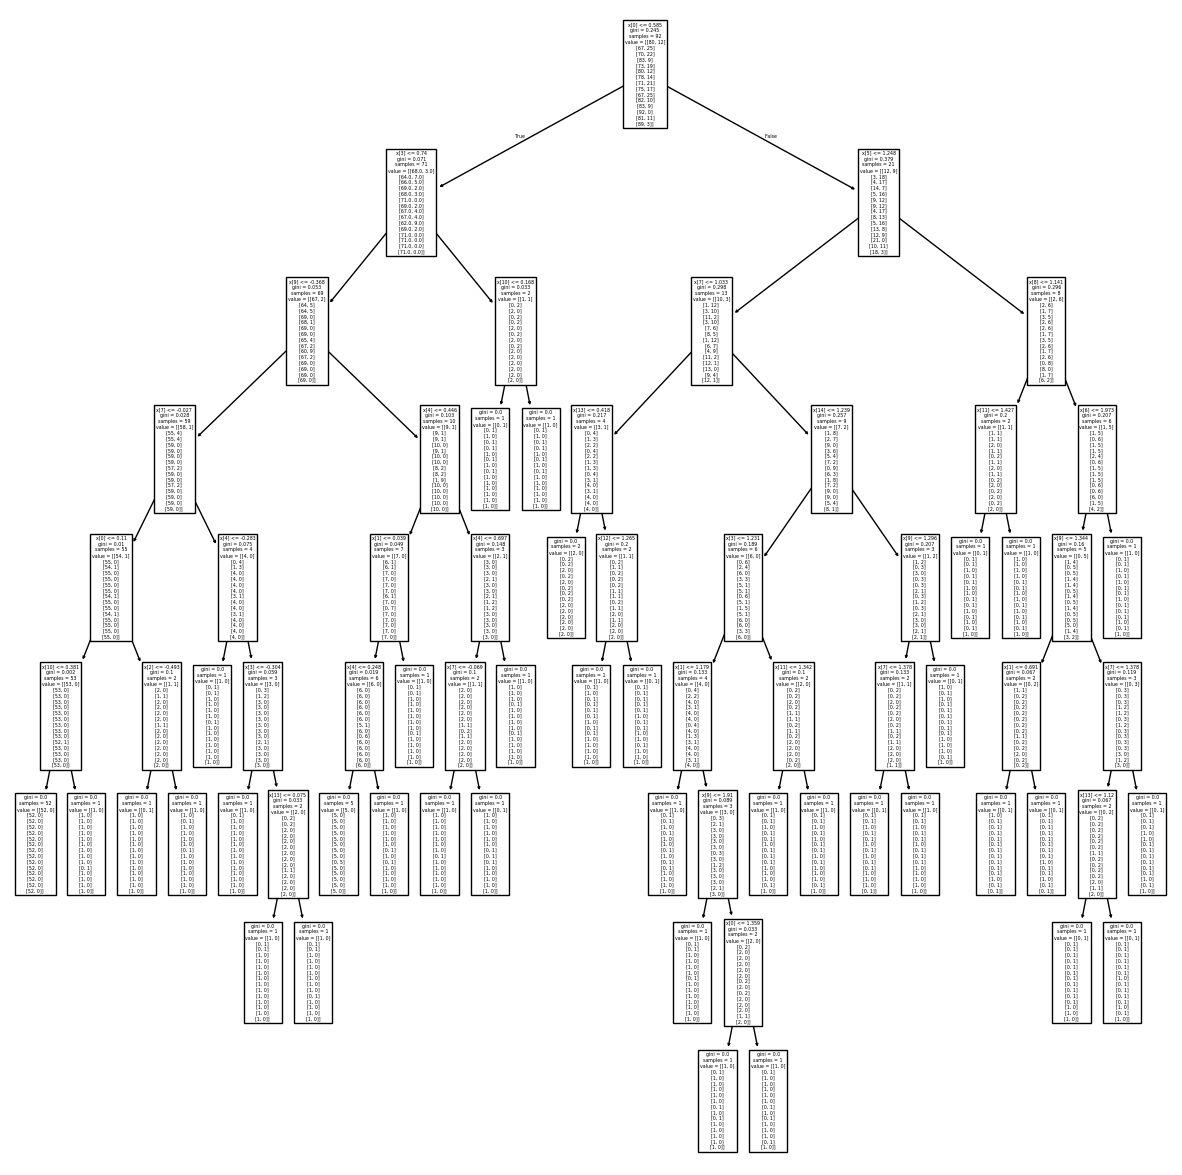

In [70]:
#Run Decision Tree classifier for testing
temp_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
temp_dt.fit(X_test, y_test)
plt.figure(figsize=(15,15))
tree.plot_tree(temp_dt)

In [75]:
#What is the training accuracy score? Using the cross validation method
y_pred_test = temp_dt.predict(X_test)
print('Test accuracy score: ',cross_val_score(temp_dt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Test accuracy score:  0.5204301075268817


C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


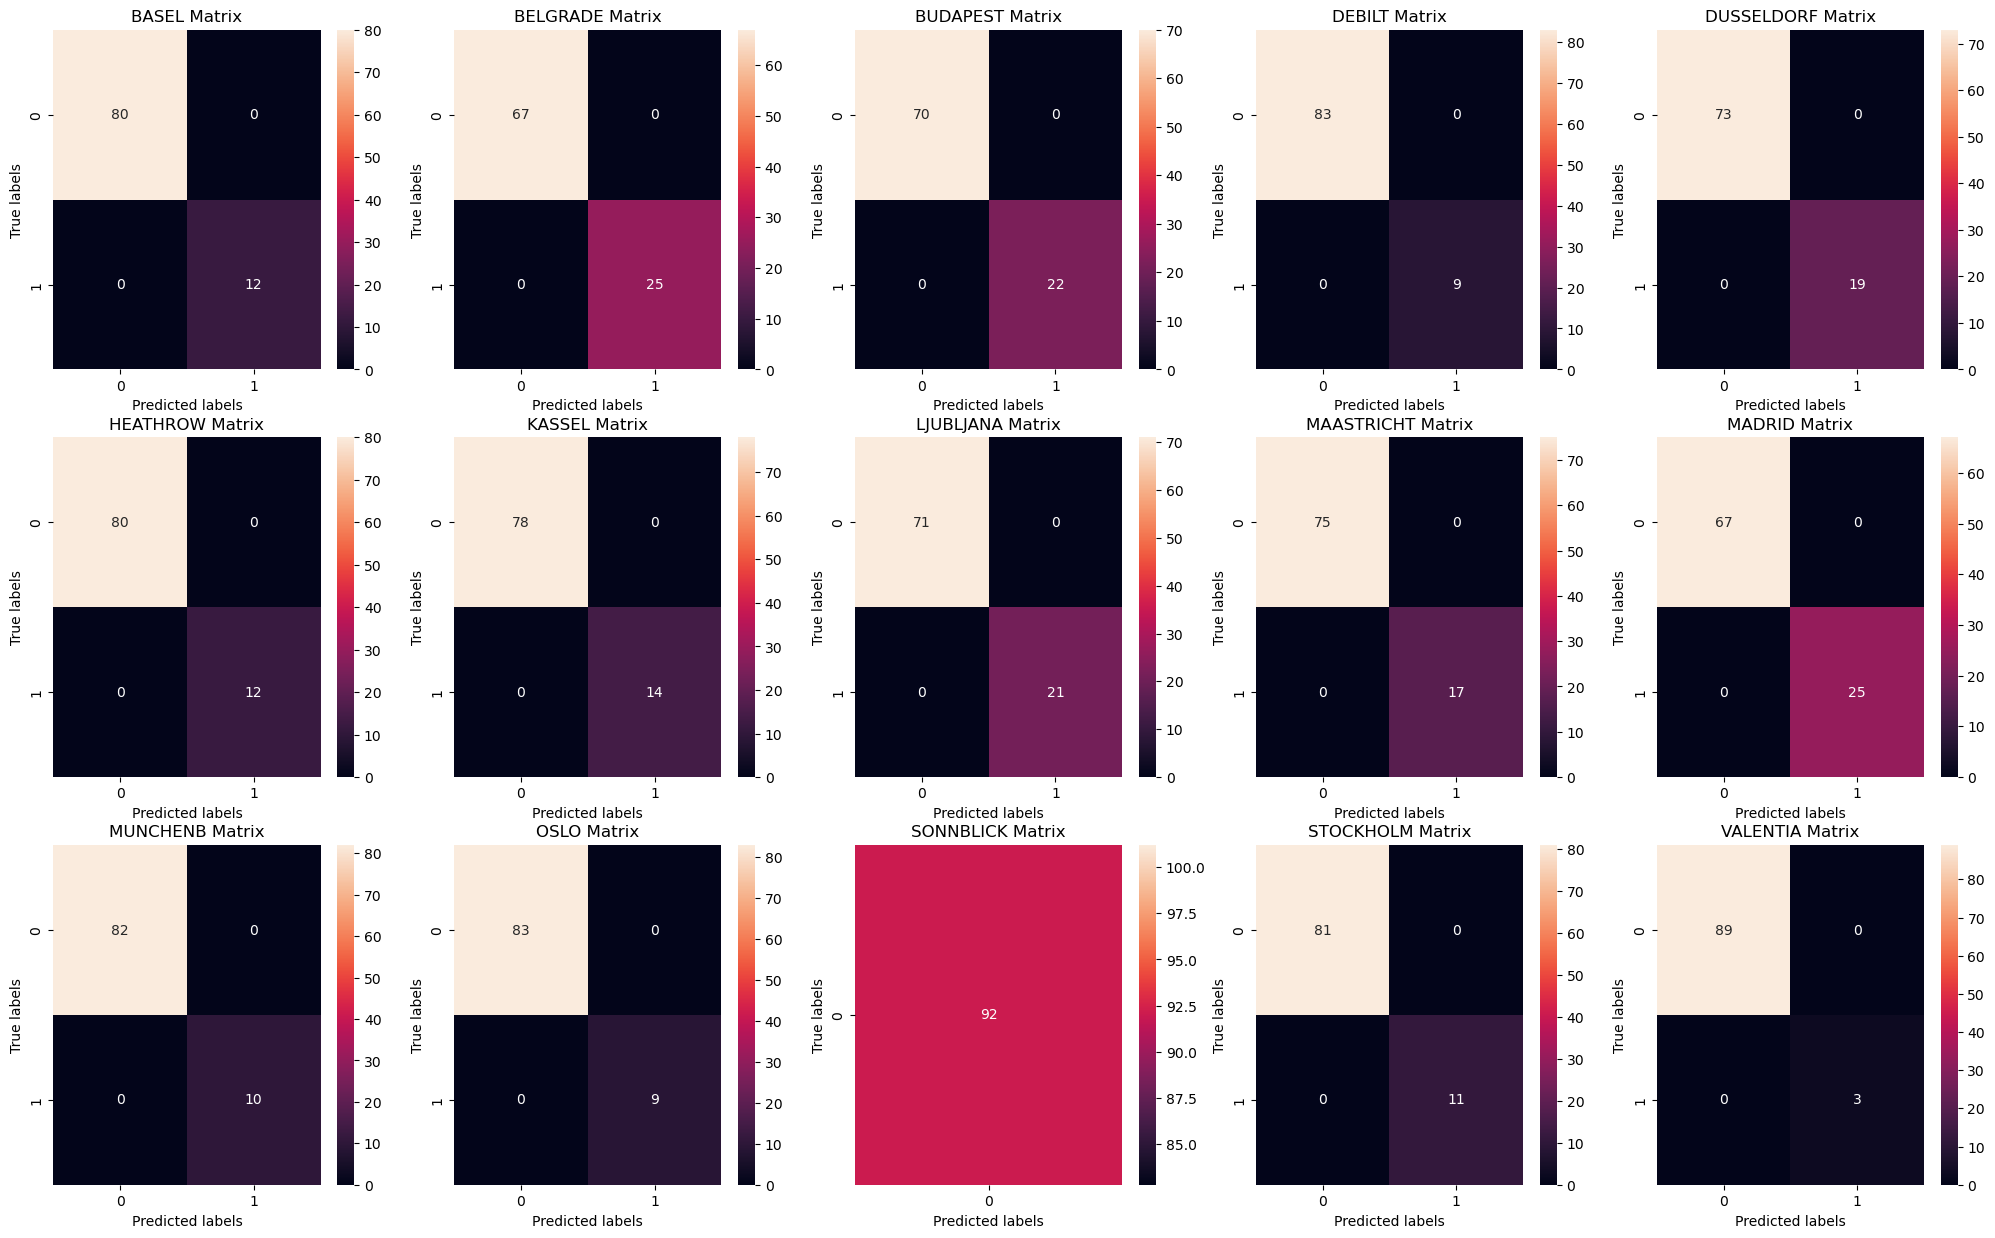

In [74]:
locations = list({x.split("_")[0] for x in df_temp[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1